In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
pd.set_option('display.max_row', 1000) #affichier 100 lignes 
pd.set_option('display.max_column', 16) #affichier 15 colonnes 

In [4]:
data = pd.read_excel(r"C:\Users\amald\OneDrive\Documents\MEMOIRE_IFID\BD_finale.xlsx") #importer dataset

In [5]:
data.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


# Analyse de la forme des données

In [6]:
df = data.copy()

In [7]:
df.shape #nombres de colonnes et lignes 

(18897, 16)

In [8]:
df.dtypes #types de variables 

ID                                        int64
Rachat                                    int64
Prime                                   float64
Fréquence                                object
Date_Effet                       datetime64[ns]
Date_Echéance                    datetime64[ns]
Durée_Contrat                           float64
Réseau_Distribution                      object
Date_de_naissance                datetime64[ns]
Age_Souscription                        float64
Age_Survenance                          float64
Sexe                                     object
Status_Contrat                           object
Date_Survenance                          object
Ancienneté_Contrat_Survenance           float64
Durée_Restante_Echéance                 float64
dtype: object

In [9]:
df.dtypes.value_counts() #compter le nombre de types de variables 

float64           6
object            5
datetime64[ns]    3
int64             2
dtype: int64

In [10]:
df.isna()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

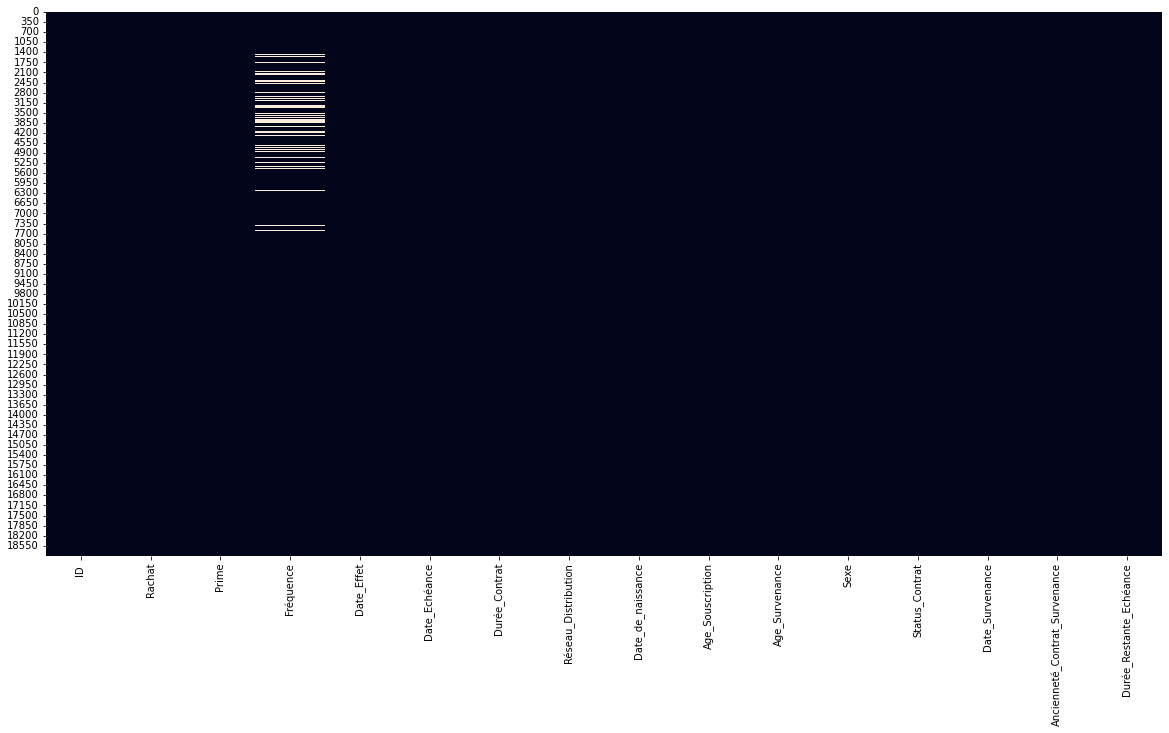

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) #pourcentages de valeurs manquantes par variable par ordre ascendent

ID                               0.000000
Rachat                           0.000000
Prime                            0.000000
Durée_Contrat                    0.000000
Réseau_Distribution              0.000000
Sexe                             0.000000
Status_Contrat                   0.000000
Date_Survenance                  0.000000
Ancienneté_Contrat_Survenance    0.000000
Durée_Restante_Echéance          0.000000
Date_de_naissance                0.000106
Age_Survenance                   0.000106
Date_Effet                       0.000529
Date_Echéance                    0.000529
Age_Souscription                 0.000635
Fréquence                        0.054718
dtype: float64

# Analyse du Fond

## 1. Visulation initiale - Elimination des colonnes inutiles

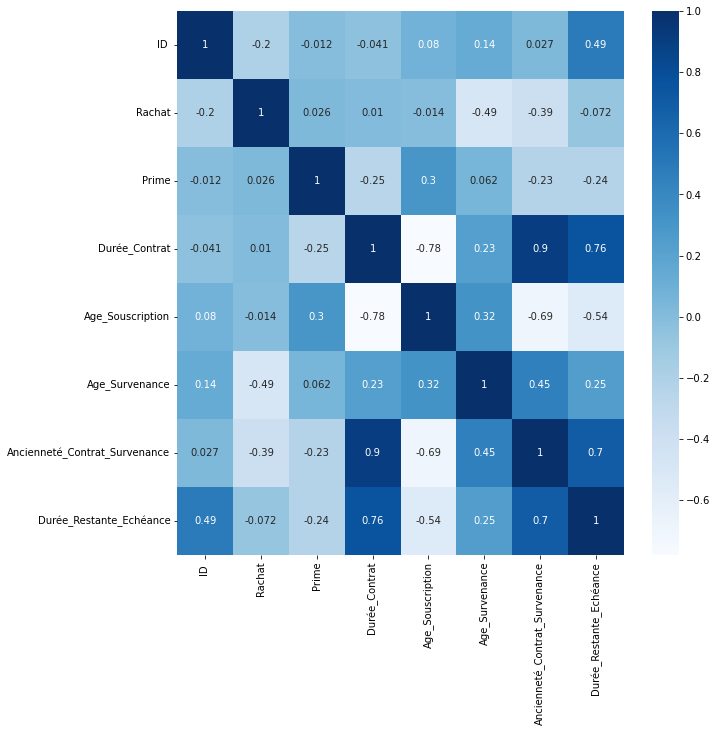

In [13]:
#Préparation des données
#Matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.savefig('matrice_correlation.png')
plt.show()

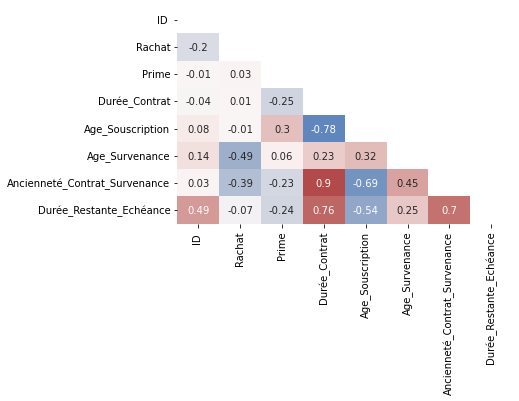

<Figure size 432x288 with 0 Axes>

In [14]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, cbar= False)
plt.show()
plt.savefig('matrice_correlation2.png')

On remarque une **forte correlation de 0.9 entre Durée_contrat et Ancienneté_Contrat_Survenance** et **une corrélation de 0.7 entre Durée_restante_Echéance et Ancienneté_Contrat_Survenance** .On supprimera donc les variables **Durée_Contrat** et **Durée_Restante_Echéance**.

In [15]:
df.drop("Durée_Contrat", axis=1, inplace=True)

In [16]:
df.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [17]:
df

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753
1,1715,0,5196.80,T,1992-09-03,2016-07-08,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274
2,4036,0,1496.88,A,1986-04-25,2016-03-02,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973
3,5212,0,145.50,A,1988-02-03,2015-11-11,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041
4,6026,0,2174.76,A,1986-09-09,2016-07-15,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,280200,0,952.56,T,2016-08-05,2053-12-19,Producteur,1986-01-27,30.0,67.939726,M,Encours,2053-12-19 00:00:00,37.397260
18893,280213,0,934.56,S,2016-08-15,2033-12-03,Producteur,1974-10-05,41.0,59.202740,F,Encours,2033-12-03 00:00:00,17.312329
18894,280221,0,7560.00,A,2016-08-13,2041-11-29,Agent,1976-03-21,40.0,65.736986,M,Encours,2041-11-29 00:00:00,25.312329
18895,280239,0,1134.00,S,2016-08-15,2051-02-05,Producteur,1986-07-30,30.0,64.564384,M,Encours,2051-02-05 00:00:00,34.498630


## 2. Analyse de la variable target

In [18]:
df['Rachat']

0        0
1        0
2        0
3        0
4        0
        ..
18892    0
18893    0
18894    0
18895    0
18896    0
Name: Rachat, Length: 18897, dtype: int64

In [19]:
df['Rachat'].value_counts(normalize=True)

0    0.953591
1    0.046409
Name: Rachat, dtype: float64

Seulement **4.64%** des contrats sont rachetés; contre **95.35%** qui sont soit encours soit echus. Donc on voit clairement que nos données sont **déséquilibrées**

## Histogrammes des variables continues 

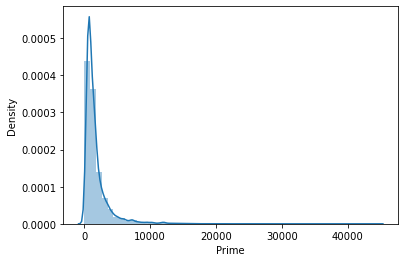

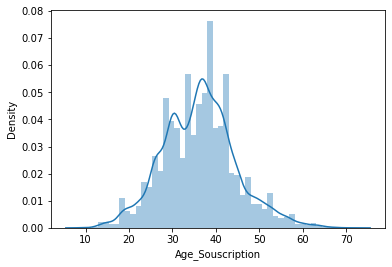

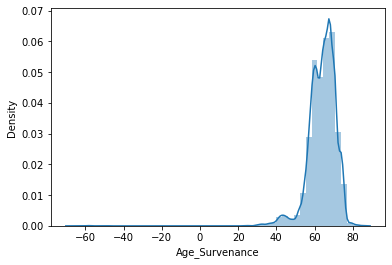

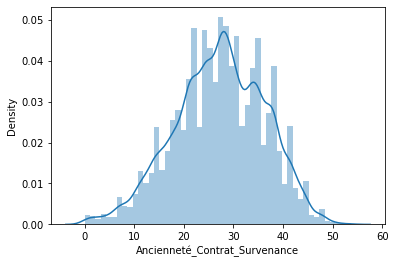

In [20]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col]) 
plt.savefig('histogramme.png')

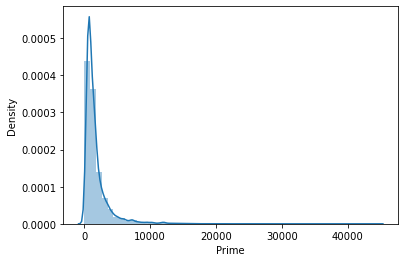

In [21]:
plt.figure()
sns.distplot(df['Prime']) 
plt.savefig('histprime.png')

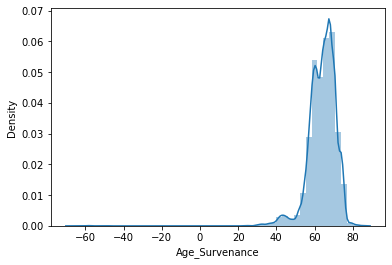

In [22]:
plt.figure()
sns.distplot(df['Age_Survenance']) 
plt.savefig('histagesurv.png')

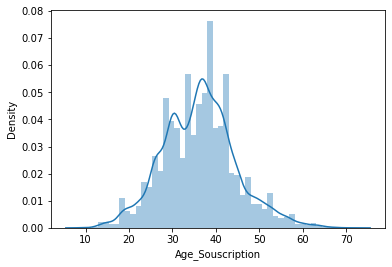

In [23]:
plt.figure()
sns.distplot(df['Age_Souscription']) 
plt.savefig('histagesous.png')

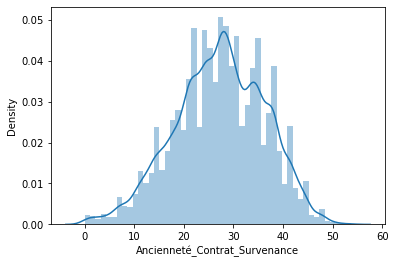

In [24]:
plt.figure()
sns.distplot(df['Ancienneté_Contrat_Survenance']) 
plt.savefig('histanciennete.png')

<AxesSubplot:xlabel='Sexe', ylabel='Rachat'>

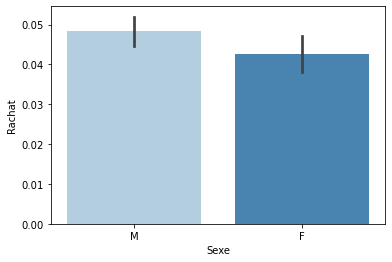

In [25]:
sns.barplot(y='Rachat',x='Sexe',data=df,palette = "Blues")

<AxesSubplot:xlabel='Fréquence', ylabel='Rachat'>

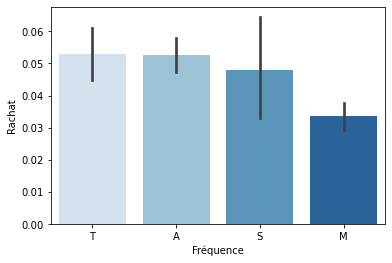

In [26]:
sns.barplot(y='Rachat',x='Fréquence',data=df ,  palette = "Blues")

<AxesSubplot:xlabel='Réseau_Distribution', ylabel='Rachat'>

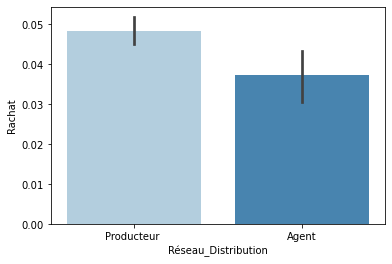

In [27]:
sns.barplot(y='Rachat',x='Réseau_Distribution',data=df  , palette = "Blues")

### variables qualitatives 

In [28]:
df['Fréquence'].unique()

array([nan, 'T', 'A', 'S', 'M'], dtype=object)

In [29]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique() )

Fréquence [nan 'T' 'A' 'S' 'M']
Réseau_Distribution ['Producteur ' 'Agent']
Sexe ['M' 'F']
Status_Contrat ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


In [30]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') #on change la forme d'affichage

Fréquence----------------------------------------- [nan 'T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']
Status_Contrat------------------------------------ ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance----------------------------------- [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


# Pré-traitement de données 

In [31]:
df = data.copy()
df.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


In [32]:
df.columns


Index(['ID ', 'Rachat', 'Prime', 'Fréquence', 'Date_Effet', 'Date_Echéance',
       'Durée_Contrat', 'Réseau_Distribution', 'Date_de_naissance',
       'Age_Souscription', 'Age_Survenance', 'Sexe', 'Status_Contrat',
       'Date_Survenance', 'Ancienneté_Contrat_Survenance',
       'Durée_Restante_Echéance'],
      dtype='object')

In [33]:
data = df.drop(['ID ', 'Date_Effet','Date_Echéance', 'Date_de_naissance',
       'Status_Contrat','Date_Survenance'], axis=1) 
#Eliminer les variables non utiles 

In [34]:
data.head()


,Rachat,Prime,Fréquence,Durée_Contrat,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,0,1296.88,NaN,23.865753,Producteur,34.0,57.934247,M,23.865753,0.0
1,0,5196.80,T,23.860274,Producteur,34.0,58.356164,M,23.860274,0.0
2,0,1496.88,A,29.873973,Producteur,32.0,62.347945,M,29.873973,0.0
3,0,145.50,A,27.789041,Producteur,34.0,62.350685,F,27.789041,0.0
4,0,2174.76,A,29.868493,Producteur,28.0,58.413699,M,29.868493,0.0


In [35]:
data.shape

(18897, 10)

In [36]:
data = data.dropna(axis=0)
data.shape

(17855, 10)

In [37]:
data.describe()

,Rachat,Prime,Durée_Contrat,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
count,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000
mean,0.045029,1783.837462,27.919342,36.385438,64.050809,27.141172,20.382020
std,0.207374,2049.331000,8.347539,8.408454,6.843959,8.997640,9.042965
min,0.000000,7.400000,0.531507,9.000000,22.668493,0.030137,0.000000
25%,0.000000,720.230000,22.095890,31.000000,60.024658,21.284932,13.838356
50%,0.000000,1164.700000,27.901370,37.000000,64.945205,27.476712,20.991781
75%,0.000000,1999.140000,34.210959,41.000000,68.512329,33.605479,26.604110
max,1.000000,44487.300000,53.791781,72.000000,85.939726,53.791781,47.498630


In [38]:
data.drop("Durée_Contrat", axis=1, inplace=True)

In [39]:
data.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [40]:
data

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,5196.80,T,Producteur,34.0,58.356164,M,23.860274
2,0,1496.88,A,Producteur,32.0,62.347945,M,29.873973
3,0,145.50,A,Producteur,34.0,62.350685,F,27.789041
4,0,2174.76,A,Producteur,28.0,58.413699,M,29.868493
5,0,2536.38,T,Producteur,37.0,67.558904,M,29.868493
...,...,...,...,...,...,...,...,...
18892,0,952.56,T,Producteur,30.0,67.939726,M,37.397260
18893,0,934.56,S,Producteur,41.0,59.202740,F,17.312329
18894,0,7560.00,A,Agent,40.0,65.736986,M,25.312329
18895,0,1134.00,S,Producteur,30.0,64.564384,M,34.498630


In [41]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}') 

Fréquence----------------------------------------- ['T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']


In [42]:
data.dropna(axis=0 , inplace = True)

In [43]:
data.shape


(17855, 8)

## Encodage Selection des variables

In [44]:
#creation d'une fontion encodage pour l'utiliser aprés sur le testset
def encodage(data):
    code = {'M':3,
            'T':2,
            'S':1,
            'A':0,
            'Producteur ':0,
            'Agent':1,
            'M':0,
            'F':1,
           }
    
    for col in data.select_dtypes('object').columns:
        data.loc[:,col] = data[col].map(code)
        
    return data

In [45]:
data = encodage(data)

## Feature Selection

In [46]:
data.columns

Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

<AxesSubplot:>

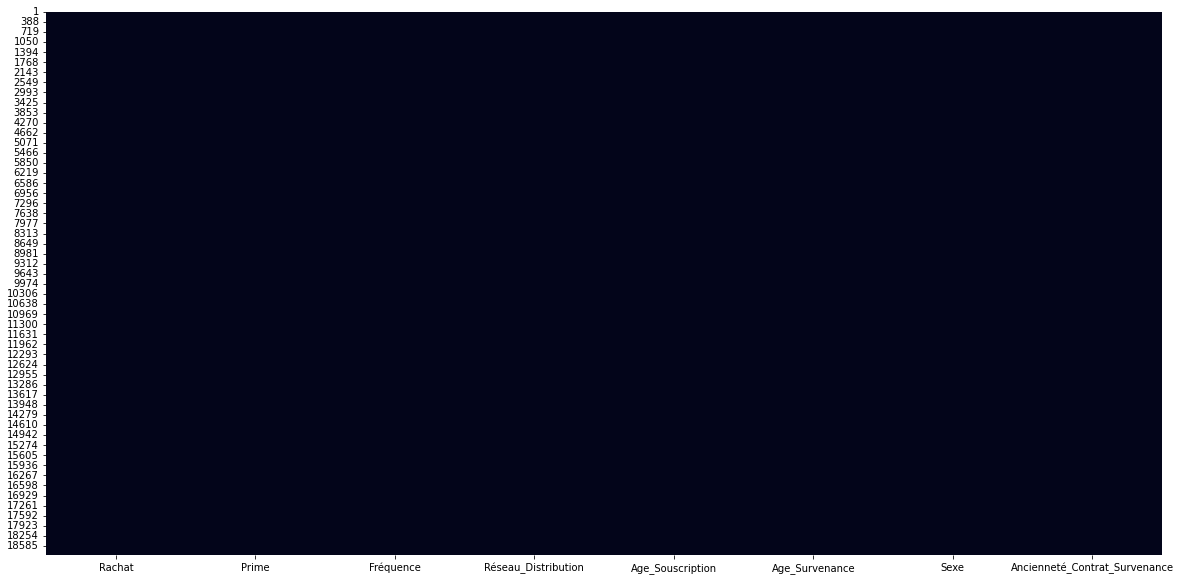

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [48]:
data.dropna(axis=0 , inplace = True)

In [49]:
data.shape

(17855, 8)

In [50]:
data.columns

Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

In [51]:
y=data['Rachat']
y


1        0
2        0
3        0
4        0
5        0
        ..
18892    0
18893    0
18894    0
18895    0
18896    0
Name: Rachat, Length: 17855, dtype: int64

In [217]:
var=['Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance']

X= data[var]
X 

,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,5196.80,2,0,34.0,58.356164,0,23.860274
2,1496.88,0,0,32.0,62.347945,0,29.873973
3,145.50,0,0,34.0,62.350685,1,27.789041
4,2174.76,0,0,28.0,58.413699,0,29.868493
5,2536.38,2,0,37.0,67.558904,0,29.868493
...,...,...,...,...,...,...,...
18892,952.56,2,0,30.0,67.939726,0,37.397260
18893,934.56,1,0,41.0,59.202740,1,17.312329
18894,7560.00,0,1,40.0,65.736986,0,25.312329
18895,1134.00,1,0,30.0,64.564384,0,34.498630


In [53]:
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold = (.9 * (1 - .9))) 
variance.fit(X) 
variance.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

 La fonction ci-dessous identifiera les variables qui sont les mêmes dans au moins 90% des observations. Dans notre cas, nous n’avons pas besoin de supprimer des variables

# splitting the data

In [54]:
import sklearn
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## REGRESSION LOGISTIQUE

Pour la régression logistique, il faut qu'on procéde au scaling avant d'appliquer l'algorithme

In [55]:
from sklearn.preprocessing import MinMaxScaler
data_lr=data.copy()
# Scale only columns that have values greater than 1
to_scale = ['Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance']
mms = MinMaxScaler()
scaled = mms.fit_transform(data_lr[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    data_lr[col] = scaled[col]
    
data_lr.head()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,0.033487,0.0,0.0,0.365079,0.627133,0.0,0.555114
2,0,0.003105,0.0,0.0,0.396825,0.627176,1.0,0.516333
3,0,0.048727,0.0,0.0,0.301587,0.564952,0.0,0.555012
4,0,0.056857,1.0,0.0,0.444444,0.709492,0.0,0.555012
5,0,0.045724,1.0,0.0,0.460317,0.691262,0.0,0.523926


In [56]:
data_lr.dropna(axis=0 , inplace = True)

In [57]:
X_lr= data_lr.drop('Rachat', axis=1)

In [58]:
X_lr

,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0.033487,0.0,0.0,0.365079,0.627133,0.0,0.555114
2,0.003105,0.0,0.0,0.396825,0.627176,1.0,0.516333
3,0.048727,0.0,0.0,0.301587,0.564952,0.0,0.555012
4,0.056857,1.0,0.0,0.444444,0.709492,0.0,0.555012
5,0.045724,1.0,0.0,0.460317,0.691262,0.0,0.523926
...,...,...,...,...,...,...,...
17850,0.021249,1.0,0.0,0.333333,0.715511,0.0,0.695052
17851,0.020844,0.5,0.0,0.507937,0.577423,1.0,0.321460
17852,0.169798,0.0,1.0,0.492063,0.680696,0.0,0.470264
17853,0.025328,0.5,0.0,0.333333,0.662163,0.0,0.641135


In [59]:
y_lr= data_lr['Rachat']
y_lr

1        0
2        0
3        0
4        0
5        0
        ..
17850    0
17851    0
17852    0
17853    0
17854    0
Name: Rachat, Length: 16813, dtype: int64

## feature selection

In [60]:
from sklearn.feature_selection import RFECV
selector = RFECV(LogisticRegression(random_state=0), step=1, min_features_to_select=3, cv=5)
selector.fit(X_lr, y_lr)
print(selector.ranking_)
print(selector.grid_scores_)

[1 2 4 1 1 3 1]
[[0.95123402 0.95212608 0.95242343 0.95240928 0.95211184]
 [0.95123402 0.95212608 0.95272079 0.95240928 0.95240928]
 [0.94974725 0.95242343 0.95272079 0.95240928 0.95240928]
 [0.94974725 0.95242343 0.95272079 0.95240928 0.95240928]
 [0.9500446  0.95242343 0.95272079 0.95240928 0.95240928]]


In [61]:
(X_lr.columns)[selector.get_support()]

Index(['Prime', 'Age_Souscription', 'Age_Survenance',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

In [62]:
var_select=['Prime', 'Age_Souscription', 'Age_Survenance',
       'Ancienneté_Contrat_Survenance']
X_lr_final=X_lr[var_select]

In [63]:
X_train_lr,X_test_lr,y_train_lr,y_test_lr  = train_test_split(X_lr_final,
                                              y_lr,
                                              test_size=0.3,
                                              random_state = 30)

In [64]:
model_lr=LogisticRegression()
model_lr.fit(X_train_lr, y_train_lr)
pred_lr= model_lr.predict(X_test_lr)

In [65]:
# Evaluate
print(confusion_matrix(y_test_lr, pred_lr))
print(classification_report(y_test_lr, pred_lr))


[[4791    0]
 [ 252    1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4791
           1       1.00      0.00      0.01       253

    accuracy                           0.95      5044
   macro avg       0.98      0.50      0.49      5044
weighted avg       0.95      0.95      0.93      5044



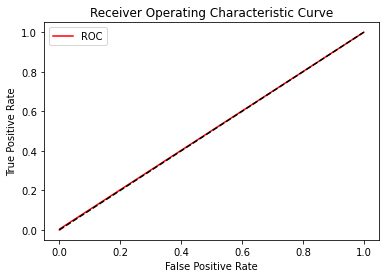

In [66]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
#pred = model_lr.predict(X_test)  
fper, tper, thresholds = roc_curve(y_test_lr, pred_lr)
plot_roc_curve(fper, tper)

**Le modèle de régression logistique est précis à 95 %**, alors où est le problème ? Oui, il peut classer correctement presque toutes les contrats non rachetés. Mais il a également **classé 100% des contrats rachetés comme non rachetés**. En un mot, le modèle est inutilisable. Le déséquilibre des classes a tué sa performance. **SMOTE** peut nous aider.

**SMOTE**

In [67]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [68]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X_train_lr_sm, y_train_lr_sm =sm.fit_resample(X_train_lr, y_train_lr)


In [69]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model1 = LogisticRegression()

params = {
    'penalty'      : ['none', 'l1', 'l2', 'elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False]
}
search = GridSearchCV(model1, params, scoring='accuracy', n_jobs=-1, cv=3)
result = search.fit(X_train_lr_sm, y_train_lr_sm)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6155730115822923
Best Hyperparameters: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}


In [70]:
model_lr_sm=LogisticRegression(C= 0.01, fit_intercept=True, penalty='l2', solver='liblinear')
model_lr_sm.fit(X_train_lr_sm, y_train_lr_sm)
pred_lr_sm= model_lr_sm.predict(X_test_lr)

# Evaluate
print(confusion_matrix(y_test_lr, pred_lr_sm))
print(classification_report(y_test_lr, pred_lr_sm))


[[3449 1342]
 [ 139  114]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      4791
           1       0.08      0.45      0.13       253

    accuracy                           0.71      5044
   macro avg       0.52      0.59      0.48      5044
weighted avg       0.92      0.71      0.79      5044



### RL with statsmodels

In [71]:
 X_train_lr_sm

,Prime,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
0,0.080769,0.460317,0.505499,0.290985
1,0.008170,0.587302,0.662553,0.330021
2,0.018567,0.492063,0.599333,0.375121
3,0.012335,0.396825,0.717892,0.624166
4,0.009816,0.587302,0.762666,0.458645
...,...,...,...,...
22431,0.024262,0.460317,0.421316,0.201992
22432,0.010485,0.077793,0.571117,0.825512
22433,0.029933,0.277960,0.296599,0.267511
22434,0.051784,0.495064,0.395110,0.126240


In [72]:
import numpy as np
import statsmodels.api as stm

model = stm.Logit(y_train_lr_sm,X_train_lr_sm)
LR = model.fit()

Optimization terminated successfully.
         Current function value: 0.646352
         Iterations 5


In [73]:
LR.params
LR.predict(X_test_lr)
(LR.predict(X_test_lr) >= 0.5).astype(int)
LR.pred_table()



array([[7474., 3744.],
       [5421., 5797.]])

In [74]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Rachat   No. Observations:                22436
Model:                          Logit   Df Residuals:                    22432
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:                 0.06751
Time:                        21:18:23   Log-Likelihood:                -14502.
converged:                       True   LL-Null:                       -15551.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Prime                             0.2671      0.325      0.821      0.412      -0.370       0.905
Age_Souscription                 13.4739      0.336     40.045      0.000      12.814      14.133
Age_Survenance                  -18.3935      0.454    -40.525      0.000     -19.283     -17.504
Ancienneté_Contrat_Survenance    11.9178      0.307     38.876      0.000      11.317      12.519
=================================================================================================
"""

In [75]:
LR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.068     
Dependent Variable:       Rachat                AIC:                   29011.0964
Date:                     2022-10-26 21:18      BIC:                   29043.1701
No. Observations:         22436                 Log-Likelihood:        -14502.   
Df Model:                 3                     LL-Null:               -15551.   
Df Residuals:             22432                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           5.0000                                                 
---------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Prime                           0.2671   0.3253   0.8212 0.4116  -0.3705   0.9047
Age_Souscription               13.4739   0.3365  40.0454 0.0000  12.8145  14.1334
Age_Survenance                -18.3935   0.4539 -40.5248 0.0000 -19.2831 -17.5039
Ancienneté_Contrat_Survenance  11.9178   0.3066  38.8762 0.0000  11.3169  12.5186
=================================================================================

"""

In [76]:
print(LR.params)

Prime                             0.267126
Age_Souscription                 13.473920
Age_Survenance                  -18.393478
Ancienneté_Contrat_Survenance    11.917781
dtype: float64


**ODDS RATIOS**

In [77]:
odds_ratios = pd.DataFrame(
    {
        "OR": LR.params,
        "Lower CI": LR.conf_int()[0],
        "Upper CI": LR.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                                         OR      Lower CI      Upper CI
Prime                          1.306205e+00  6.904234e-01  2.471195e+00
Age_Souscription               7.106388e+05  3.674923e+05  1.374199e+06
Age_Survenance                 1.027577e-08  4.221520e-09  2.501264e-08
Ancienneté_Contrat_Survenance  1.499086e+05  8.220237e+04  2.733811e+05


**SMOTEENN**

In [78]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [79]:
sm_enn=SMOTEENN()
X_train_lr_enn, y_train_lr_enn =sm_enn.fit_resample(X_train_lr, y_train_lr)

In [80]:
model_lr_enn=LogisticRegression(C= 0.01, fit_intercept=True, penalty='l1', solver='liblinear')
model_lr_enn.fit(X_train_lr_enn, y_train_lr_enn)
pred_lr_enn= model_lr_enn.predict(X_test_lr)

# Evaluate
print(confusion_matrix(y_test_lr, pred_lr_enn))
print(classification_report(y_test_lr, pred_lr_enn))


[[2947 1844]
 [ 119  134]]
              precision    recall  f1-score   support

           0       0.96      0.62      0.75      4791
           1       0.07      0.53      0.12       253

    accuracy                           0.61      5044
   macro avg       0.51      0.57      0.44      5044
weighted avg       0.92      0.61      0.72      5044



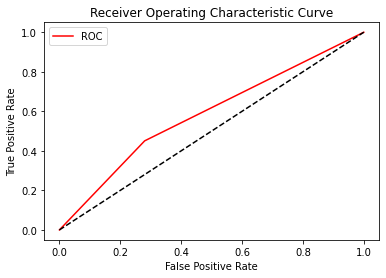

In [81]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()  
fper, tper, thresholds = roc_curve(y_test_lr, pred_lr_sm)
plot_roc_curve(fper, tper)

In [82]:
from sklearn import metrics
auc1 = metrics.roc_auc_score(y_test_lr,pred_lr)
auc2 = metrics.roc_auc_score(y_test_lr,pred_lr_sm)

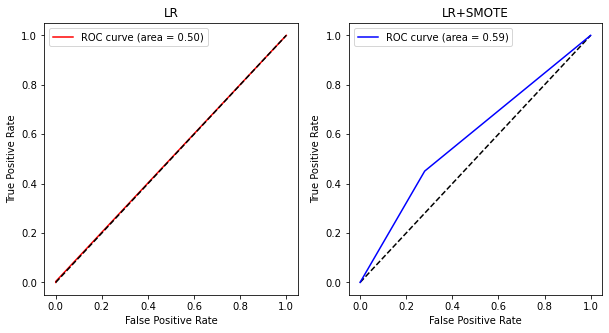

In [83]:
import matplotlib.pyplot as plt
plt.figure (figsize= (10, 5)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(1, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='red', label="ROC curve (area = %0.2f)" % auc1)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LR')
    plt.legend()
    #plt.show()
#pred2_sm = model2_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test_lr, pred_lr)
plot_roc_curve(fper, tper)

plt.subplot(1, 2, 2)
# Modify right plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LR+SMOTE')
    plt.legend()
    #plt.show()


fper, tper, thresholds = roc_curve(y_test_lr, pred_lr_sm)
plot_roc_curve(fper, tper)




plt.savefig("roclr.png" ,dpi=100)
plt.show()

## ARBRE DE DECISION

Feature selection

In [204]:
from sklearn.feature_selection import RFECV
selector = RFECV(DecisionTreeClassifier(random_state=0), step=1, min_features_to_select=3, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[1 1 2 1 1 1 1]
[[0.96359563 0.96275553 0.96303556 0.95295435 0.97563708]
 [0.96695603 0.96471577 0.9691963  0.95211425 0.9683562 ]
 [0.96527583 0.95967516 0.966676   0.95407449 0.97339681]
 [0.96779614 0.95967516 0.96695603 0.95603472 0.97899748]
 [0.96527583 0.95939513 0.97171661 0.95379446 0.97199664]]


In [218]:
X_dt= X.drop('Réseau_Distribution', axis = 1)

In [219]:
X_dt

,Prime,Fréquence,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,5196.80,2,34.0,58.356164,0,23.860274
2,1496.88,0,32.0,62.347945,0,29.873973
3,145.50,0,34.0,62.350685,1,27.789041
4,2174.76,0,28.0,58.413699,0,29.868493
5,2536.38,2,37.0,67.558904,0,29.868493
...,...,...,...,...,...,...
18892,952.56,2,30.0,67.939726,0,37.397260
18893,934.56,1,41.0,59.202740,1,17.312329
18894,7560.00,0,40.0,65.736986,0,25.312329
18895,1134.00,1,30.0,64.564384,0,34.498630


In [220]:
# Splitting Train and Test Data
X_train,X_test,y_train,y_test  = train_test_split(X_dt,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)


on a excuté l'algorithme avec les paramétres par défaut

In [221]:
DT1 = DecisionTreeClassifier()
DT1.fit(X_train, y_train)
pred_dt1 = DT1.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_dt1))
print(classification_report(y_test, pred_dt1))

[[5052   47]
 [  84  174]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5099
           1       0.79      0.67      0.73       258

    accuracy                           0.98      5357
   macro avg       0.89      0.83      0.86      5357
weighted avg       0.97      0.98      0.97      5357



on a cherché les meilleurs paramétres avec GridSearchCV

In [222]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [ 50,60,70,80,90,100],
    'max_depth'            : [5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_model2 = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % CV_model2.best_score_)
print('Best Hyperparameters: %s' % CV_model2.best_params_)

Best Score: 0.9833573371739478
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 50}


on a réexcuté l'algorithme avec les nouveaux paramétres 

In [223]:
DT = DecisionTreeClassifier(max_depth= 5,min_samples_leaf= 30, min_samples_split= 50)
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

[[5089   10]
 [  85  173]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5099
           1       0.95      0.67      0.78       258

    accuracy                           0.98      5357
   macro avg       0.96      0.83      0.89      5357
weighted avg       0.98      0.98      0.98      5357



ce modéle poséde le score f1 le plus élevé

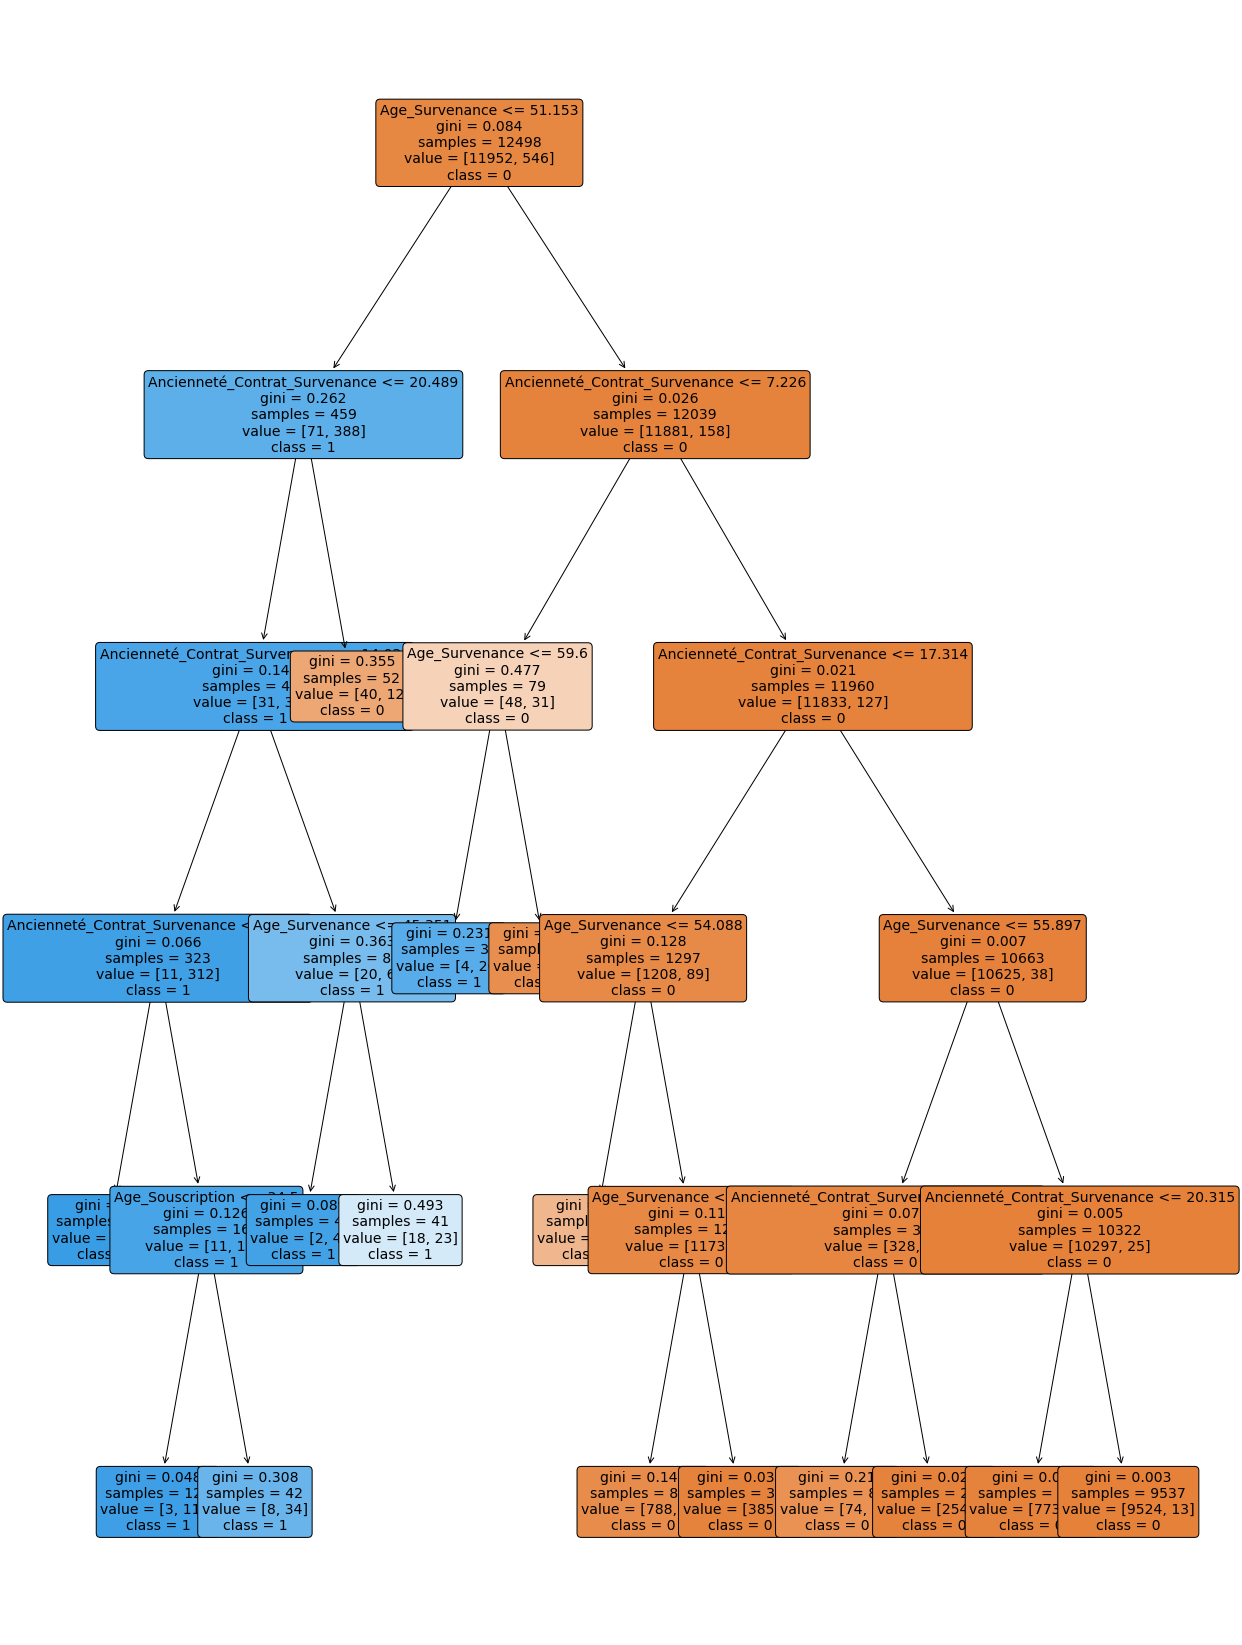

In [225]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,30))
a = plot_tree(DT, 
              feature_names=X_dt.columns,    
              class_names=data['Rachat'].unique().astype(str), 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('DT.png')
plt.show()

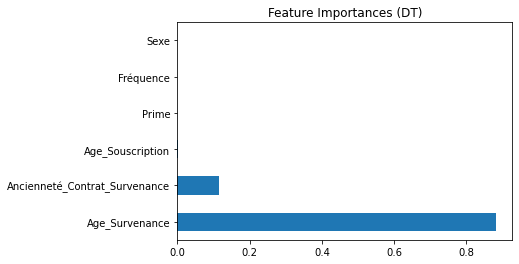

In [226]:
feat_importances= pd.Series(DT.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances (DT)')
plt.savefig('DT_featimp.png')
plt.show()

In [215]:
print(DT.feature_importances_)

[0.         0.         0.00232662 0.88215253 0.         0.11552085]


### courbe ROC

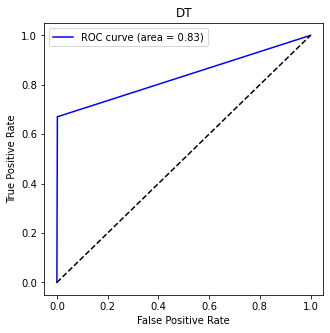

In [216]:
from sklearn import metrics
auc_dt = metrics.roc_auc_score(y_test,pred_dt)
import matplotlib.pyplot as plt
plt.figure (figsize= (5, 5)) 

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_dt)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DT')
    plt.legend()  
plt.savefig('roc-dt')
fper, tper, thresholds = roc_curve(y_test, pred_dt)
plot_roc_curve(fper, tper)
plt.show()



essayons maintenant avec SMOTE et SMOTEENN

**SMOTE**

In [86]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_sm, y_train_sm =smote.fit_resample(X_train, y_train)


In [152]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [ 50,60,70,80,90,100],
    'max_depth'            : [3,4,5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='f1', n_jobs=-1, cv=3)
CV_model2 = search.fit(X_train_sm, y_train_sm)

# summarize result
print('Best Score: %s' % CV_model2.best_score_)
print('Best Hyperparameters: %s' % CV_model2.best_params_)

Best Score: 0.948985076339337
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 70}


In [153]:
DT_sm = DecisionTreeClassifier(max_depth= 8,min_samples_leaf= 30, min_samples_split= 70)
DT_sm.fit(X_train_sm, y_train_sm)
pred_dt_sm = DT_sm.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, pred_dt_sm))
print(classification_report(y_test, pred_dt_sm))

[[4874  225]
 [  47  211]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5099
           1       0.48      0.82      0.61       258

    accuracy                           0.95      5357
   macro avg       0.74      0.89      0.79      5357
weighted avg       0.97      0.95      0.96      5357



**SMOTEENN**

In [89]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [90]:
sm_enn=SMOTEENN()
X_train_enn, y_train_enn =sm_enn.fit_resample(X_train, y_train)

In [91]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [20,30,40,50,60,70,80,90,100],
    'max_depth'            : [3,4,5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_enn = search.fit(X_train_enn, y_train_enn)

# summarize result
print('Best Score: %s' % CV_enn.best_score_)
print('Best Hyperparameters: %s' % CV_enn.best_params_)

Best Score: 0.9641773055001894
Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 30}


In [138]:
DT_enn = DecisionTreeClassifier(max_depth=7 ,min_samples_leaf= 30, min_samples_split= 30)
DT_enn.fit(X_train_enn, y_train_enn)
pred_dt_enn= DT_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_dt_enn))
print(classification_report(y_test, pred_dt_enn))


[[4810  289]
 [  34  224]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5099
           1       0.44      0.87      0.58       258

    accuracy                           0.94      5357
   macro avg       0.71      0.91      0.77      5357
weighted avg       0.97      0.94      0.95      5357



## RONDOM FOREST

**SANS SMOTE**

In [227]:
from sklearn.feature_selection import RFECV
selector = RFECV(RandomForestClassifier(random_state=0), step=1, min_features_to_select=3, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[1 1 2 1 1 1 1]
[[0.97899748 0.97759731 0.97703724 0.96051526 0.98795856]
 [0.97955755 0.98011761 0.98851862 0.96555587 0.98739849]
 [0.97927751 0.97955755 0.98767852 0.9691963  0.98739849]
 [0.97983758 0.98179782 0.98907869 0.97087651 0.98879866]
 [0.97983758 0.98151778 0.98767852 0.97115654 0.98823859]]


In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_test)


In [229]:
# Evaluate
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[5089   10]
 [  84  174]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5099
           1       0.95      0.67      0.79       258

    accuracy                           0.98      5357
   macro avg       0.96      0.84      0.89      5357
weighted avg       0.98      0.98      0.98      5357



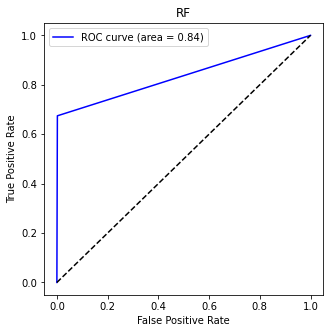

In [230]:
from sklearn import metrics
auc_rf = metrics.roc_auc_score(y_test,pred_rf)
import matplotlib.pyplot as plt
plt.figure (figsize= (5, 5)) 

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_rf)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RF')
    plt.legend()  

fper, tper, thresholds = roc_curve(y_test, pred_rf)
plot_roc_curve(fper, tper)
plt.savefig('roc-RF')
plt.show()



In [158]:
rf_cv=RandomForestClassifier(max_depth=8, max_features=2, n_estimators=200,
                       random_state=30)
rf_cv.fit(X_train, y_train)
pred_rfcv= rf_cv.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, pred_rfcv))
print(classification_report(y_test, pred_rfcv))

[[5088   11]
 [  86  172]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5099
           1       0.94      0.67      0.78       258

    accuracy                           0.98      5357
   macro avg       0.96      0.83      0.89      5357
weighted avg       0.98      0.98      0.98      5357



In [ ]:
feat_importances= pd.Series(rf_cv.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances (RF)')
plt.savefig('rffeatureimpo.png')
plt.show()

In [ ]:
feat_importances.nlargest(10)

**AVEC SMOTE**

In [166]:
rf_sm = RandomForestClassifier( max_depth=8, max_features=2,
                       n_estimators=100, random_state=30)
rf_sm.fit(X_train_sm, y_train_sm)
pred_rf_sm = rf_sm.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_rf_sm))
print(classification_report(y_test, pred_rf_sm))

[[4926  173]
 [  44  214]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5099
           1       0.55      0.83      0.66       258

    accuracy                           0.96      5357
   macro avg       0.77      0.90      0.82      5357
weighted avg       0.97      0.96      0.96      5357



# XGBOOST

In [167]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)


# Evaluate
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


[[5083   16]
 [  76  182]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5099
           1       0.92      0.71      0.80       258

    accuracy                           0.98      5357
   macro avg       0.95      0.85      0.89      5357
weighted avg       0.98      0.98      0.98      5357



In [168]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate= 0.1,n_estimators= 1000,max_depth= 6)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)


# Evaluate
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


[[5084   15]
 [  76  182]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5099
           1       0.92      0.71      0.80       258

    accuracy                           0.98      5357
   macro avg       0.95      0.85      0.90      5357
weighted avg       0.98      0.98      0.98      5357



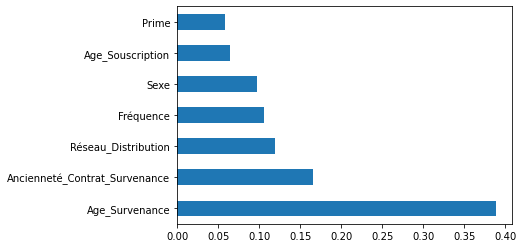

In [169]:
feat_importances_xgb= pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')
plt.show()

In [170]:
feat_importances_xgb.nlargest(10)

Age_Survenance                   0.389039
Ancienneté_Contrat_Survenance    0.165415
Réseau_Distribution              0.118672
Fréquence                        0.106227
Sexe                             0.097617
Age_Souscription                 0.064734
Prime                            0.058295
dtype: float32

Avec SMOTE

In [171]:

xgb.fit(X_train_sm, y_train_sm)
predxgb_sm = xgb.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, predxgb_sm))
print(classification_report(y_test, predxgb_sm))


[[5066   33]
 [  59  199]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5099
           1       0.86      0.77      0.81       258

    accuracy                           0.98      5357
   macro avg       0.92      0.88      0.90      5357
weighted avg       0.98      0.98      0.98      5357



Pas d'amélioration avec smote 

In [172]:

xgb.fit(X_train_enn, y_train_enn)
predxgb_enn= xgb.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, predxgb_enn))
print(classification_report(y_test, predxgb_enn))


[[5005   94]
 [  48  210]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5099
           1       0.69      0.81      0.75       258

    accuracy                           0.97      5357
   macro avg       0.84      0.90      0.87      5357
weighted avg       0.98      0.97      0.97      5357



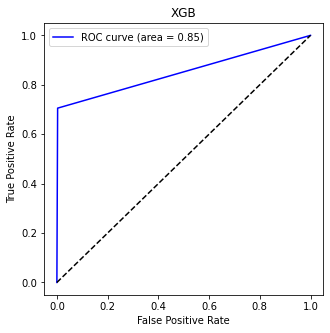

In [173]:
from sklearn import metrics
auc_xgb = metrics.roc_auc_score(y_test,pred_xgb)
import matplotlib.pyplot as plt
plt.figure (figsize= (5, 5)) 

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_xgb)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGB')
    plt.legend()  

fper, tper, thresholds = roc_curve(y_test, pred_xgb)
plot_roc_curve(fper, tper)
plt.savefig('roc-xgb')
plt.show()


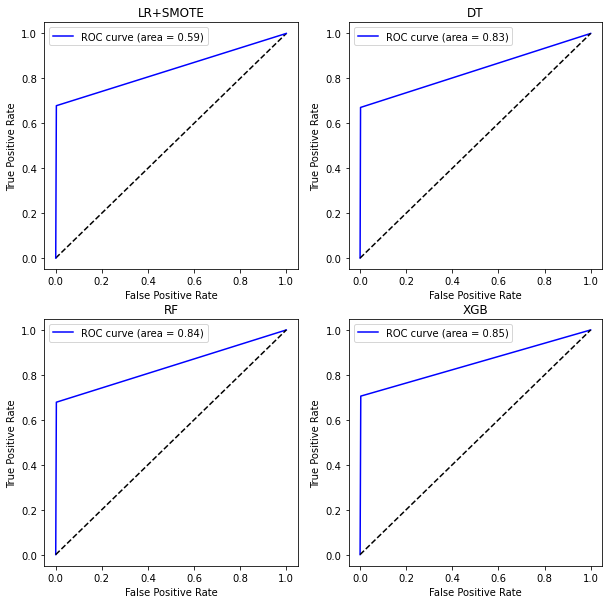

In [178]:
import matplotlib.pyplot as plt
auc_rf = metrics.roc_auc_score(y_test,pred_rf)
auc_rfsm= metrics.roc_auc_score(y_test,pred_rf_sm)
plt.figure (figsize= (10, 10)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(2, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LR+SMOTE')
    plt.legend()
fper, tper, thresholds = roc_curve(y_test, pred_rf)
plot_roc_curve(fper, tper)

plt.subplot(2, 2, 2)

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_dt)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DT')
    plt.legend()  
fper, tper, thresholds = roc_curve(y_test, pred_dt)
plot_roc_curve(fper, tper)

plt.subplot(2, 2, 3)

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_rf)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RF')
    plt.legend()  

fper, tper, thresholds = roc_curve(y_test, pred_rf)
plot_roc_curve(fper, tper)
plt.subplot(2, 2, 4)
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_xgb)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGB')
    plt.legend()  

fper, tper, thresholds = roc_curve(y_test, pred_xgb)
plot_roc_curve(fper, tper)

plt.savefig('roc-all')
plt.show()
